## XGBoost Classifier

In [ ]:
import pandas as pd
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:5]
y = df.iloc[:, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### XGBoost

In [ ]:
import xgboost
print(xgboost.__version__)

0.90


In [ ]:
from xgboost import XGBClassifier

In [ ]:
(XGBClassifier)

xgboost.sklearn.XGBClassifier

In [ ]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

In [ ]:
model=xgbt.fit(X_train, y_train)
model

XGBClassifier(learning_rate=0.2, max_depth=2, n_estimarors=10, num_class=2,
              objective='multi:softprob', random_state=123)

In [ ]:
xgbt_pred = xgbt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, xgbt_pred)

1.0

In [ ]:
xgbt.score(X_train, y_train)

1.0

In [ ]:
xgbt.score(X_test, y_test)

1.0

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

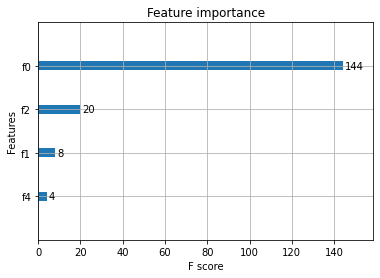

In [ ]:
plot_importance(xgbt)